### <font color='black'>Q1. (CNN with	gender	classification	32x32	image)</font>

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OneHotEncoder
import os
from PIL import Image

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.local import LocallyConnected2D

Using TensorFlow backend.


In [2]:
num_classes = 2

directory_32 = "data/womanman-32/"
directory_man = "man/"
directory_woman = "woman/"

In [3]:
filelist_32_man = [file for file in os.listdir(directory_32 + directory_man) if file.endswith('.png')]
filelist_32_woman = [file for file in os.listdir(directory_32 + directory_woman) if file.endswith('.png')]

In [4]:
X = np.zeros([len(filelist_32_man) + len(filelist_32_woman), 32, 32, 3])
Y = np.zeros([len(filelist_32_man) + len(filelist_32_woman), 2])

index = 0
for file in filelist_32_man:
    X[index] = np.array(Image.open(directory_32 + directory_man + file))
    Y[index][0] = 1
    index = index + 1
for file in filelist_32_woman:
    X[index] = np.array(Image.open(directory_32 + directory_woman + file))
    Y[index][1] = 1
    index = index + 1

In [5]:
randomShuffle = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)

In [22]:
def createCNNModel(n_classes):
    model = Sequential()
    # Convenlutional layer 1
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu'))
    # Pooling layer 1
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Convenlutional layer 2
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    # Pooling layer 2
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    model.add(Dropout(0.05))
    # Convenlutional layer 3
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    # Pooling layer 3
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    
    # Locally-connected layer
    #model.add(LocallyConnected2D(256, (2, 2)))
    
    model.add(Flatten())
    # Fully-connected layer 1
    model.add(Dense(256, activation='relu'))
    # Fully-connected layer 2
    model.add(Dense(n_classes, activation='softmax'))
    epochs = 75
    optimizer_adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])
    print(model.summary())
    return model, epochs

In [23]:
accuracies = []

In [24]:
for train_index, test_index in randomShuffle.split(X):
    
    X_train = X[train_index, :]
    Y_train = Y[train_index, :]

    X_test = X[test_index, :]
    Y_test = Y[test_index, :]
    
    model, epochs = createCNNModel(num_classes)
    
    model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, verbose=1, batch_size=100)
    scores = model.evaluate(X_test, Y_test)
    accuracies.append(scores[1]*100)
    

C:\Users\vwslz\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  after removing the cwd from sys.path.
C:\Users\vwslz\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
C:\Users\vwslz\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  del sys.path[0]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_121 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_122 (MaxPoolin (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_81 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_123 (MaxPoolin (None, 2, 2, 128)         0         
__________

1124/1124 [==============================] - 0s 335us/step - loss: 0.6182 - acc: 0.7117 - val_loss: 0.6336 - val_acc: 0.6879
Epoch 19/75
1124/1124 [==============================] - 0s 295us/step - loss: 0.6095 - acc: 0.7367 - val_loss: 0.6116 - val_acc: 0.7021
Epoch 20/75
1124/1124 [==============================] - 0s 288us/step - loss: 0.5520 - acc: 0.7402 - val_loss: 0.5983 - val_acc: 0.6986
Epoch 21/75
1124/1124 [==============================] - 0s 308us/step - loss: 0.5442 - acc: 0.7562 - val_loss: 0.6014 - val_acc: 0.6986
Epoch 22/75
1124/1124 [==============================] - 0s 312us/step - loss: 0.5104 - acc: 0.7642 - val_loss: 0.5948 - val_acc: 0.7270
Epoch 23/75
1124/1124 [==============================] - 0s 306us/step - loss: 0.5204 - acc: 0.7651 - val_loss: 0.6148 - val_acc: 0.7234
Epoch 24/75
1124/1124 [==============================] - 0s 314us/step - loss: 0.4740 - acc: 0.7669 - val_loss: 0.6380 - val_acc: 0.7092
Epoch 25/75
1124/1124 [==============================

dense_86 (Dense)             (None, 2)                 514       
Total params: 225,090
Trainable params: 225,090
Non-trainable params: 0
_________________________________________________________________
None
Train on 1124 samples, validate on 282 samples
Epoch 1/75
1124/1124 [==============================] - 3s 3ms/step - loss: 6.4989 - acc: 0.4911 - val_loss: 4.6817 - val_acc: 0.4858
Epoch 2/75
1124/1124 [==============================] - 0s 309us/step - loss: 5.2505 - acc: 0.5044 - val_loss: 2.4085 - val_acc: 0.5922
Epoch 3/75
1124/1124 [==============================] - 0s 315us/step - loss: 4.0828 - acc: 0.5391 - val_loss: 1.9331 - val_acc: 0.5638
Epoch 4/75
1124/1124 [==============================] - 0s 311us/step - loss: 2.8789 - acc: 0.5783 - val_loss: 1.9856 - val_acc: 0.5851
Epoch 5/75
1124/1124 [==============================] - 0s 302us/step - loss: 2.6089 - acc: 0.5845 - val_loss: 1.2762 - val_acc: 0.6312
Epoch 6/75
1124/1124 [==============================] - 0s 324us/s

1124/1124 [==============================] - 0s 313us/step - loss: 0.5259 - acc: 0.7598 - val_loss: 0.6589 - val_acc: 0.6915
Epoch 30/75
1124/1124 [==============================] - 0s 310us/step - loss: 0.5183 - acc: 0.7625 - val_loss: 0.6614 - val_acc: 0.6986
Epoch 31/75
1124/1124 [==============================] - 0s 298us/step - loss: 0.4728 - acc: 0.7847 - val_loss: 0.6507 - val_acc: 0.6879
Epoch 32/75
1124/1124 [==============================] - 0s 291us/step - loss: 0.4497 - acc: 0.7963 - val_loss: 0.6485 - val_acc: 0.6879
Epoch 33/75
1124/1124 [==============================] - 0s 314us/step - loss: 0.4528 - acc: 0.7847 - val_loss: 0.6666 - val_acc: 0.6950
Epoch 34/75
1124/1124 [==============================] - 0s 314us/step - loss: 0.4734 - acc: 0.7927 - val_loss: 0.6612 - val_acc: 0.6915
Epoch 35/75
1124/1124 [==============================] - 0s 307us/step - loss: 0.4717 - acc: 0.7811 - val_loss: 0.6677 - val_acc: 0.7163
Epoch 36/75
1124/1124 [==============================

Train on 1124 samples, validate on 282 samples
Epoch 1/75
1124/1124 [==============================] - 4s 3ms/step - loss: 4.7611 - acc: 0.5000 - val_loss: 2.1218 - val_acc: 0.5496
Epoch 2/75
1124/1124 [==============================] - 0s 300us/step - loss: 3.4040 - acc: 0.5507 - val_loss: 1.4401 - val_acc: 0.6099
Epoch 3/75
1124/1124 [==============================] - 0s 310us/step - loss: 2.6988 - acc: 0.5721 - val_loss: 1.7240 - val_acc: 0.6277
Epoch 4/75
1124/1124 [==============================] - 0s 310us/step - loss: 2.3554 - acc: 0.5988 - val_loss: 1.7594 - val_acc: 0.6099
Epoch 5/75
1124/1124 [==============================] - 0s 308us/step - loss: 1.8552 - acc: 0.6352 - val_loss: 1.3430 - val_acc: 0.6348
Epoch 6/75
1124/1124 [==============================] - 0s 309us/step - loss: 1.6556 - acc: 0.6237 - val_loss: 1.4921 - val_acc: 0.5922
Epoch 7/75
1124/1124 [==============================] - 0s 310us/step - loss: 1.6591 - acc: 0.6246 - val_loss: 1.2179 - val_acc: 0.6028
Epo

Epoch 31/75
1124/1124 [==============================] - 0s 270us/step - loss: 0.4334 - acc: 0.7972 - val_loss: 0.6234 - val_acc: 0.6986
Epoch 32/75
1124/1124 [==============================] - 0s 263us/step - loss: 0.3874 - acc: 0.8372 - val_loss: 0.6158 - val_acc: 0.7092
Epoch 33/75
1124/1124 [==============================] - 0s 264us/step - loss: 0.4098 - acc: 0.8087 - val_loss: 0.6040 - val_acc: 0.7128
Epoch 34/75
1124/1124 [==============================] - 0s 279us/step - loss: 0.3946 - acc: 0.8265 - val_loss: 0.5918 - val_acc: 0.7340
Epoch 35/75
1124/1124 [==============================] - 0s 322us/step - loss: 0.3923 - acc: 0.8230 - val_loss: 0.5908 - val_acc: 0.7270
Epoch 36/75
1124/1124 [==============================] - 0s 335us/step - loss: 0.3776 - acc: 0.8345 - val_loss: 0.5870 - val_acc: 0.7340
Epoch 37/75
1124/1124 [==============================] - 0s 314us/step - loss: 0.3960 - acc: 0.8194 - val_loss: 0.5903 - val_acc: 0.7376
Epoch 38/75
1124/1124 [==================

Epoch 2/75
1124/1124 [==============================] - 0s 308us/step - loss: 3.1497 - acc: 0.5427 - val_loss: 1.3055 - val_acc: 0.5957
Epoch 3/75
1124/1124 [==============================] - 0s 313us/step - loss: 2.7624 - acc: 0.5302 - val_loss: 1.0628 - val_acc: 0.6312
Epoch 4/75
1124/1124 [==============================] - 0s 320us/step - loss: 2.2590 - acc: 0.5472 - val_loss: 0.9921 - val_acc: 0.6596
Epoch 5/75
1124/1124 [==============================] - 0s 317us/step - loss: 1.6882 - acc: 0.6077 - val_loss: 0.8810 - val_acc: 0.6844
Epoch 6/75
1124/1124 [==============================] - 0s 311us/step - loss: 1.5028 - acc: 0.6085 - val_loss: 0.8342 - val_acc: 0.7092
Epoch 7/75
1124/1124 [==============================] - 0s 309us/step - loss: 1.3055 - acc: 0.6192 - val_loss: 0.7903 - val_acc: 0.7234
Epoch 8/75
1124/1124 [==============================] - 0s 322us/step - loss: 1.1630 - acc: 0.6352 - val_loss: 0.7719 - val_acc: 0.7270
Epoch 9/75
1124/1124 [==========================

Epoch 62/75
1124/1124 [==============================] - 0s 313us/step - loss: 0.1295 - acc: 0.9520 - val_loss: 0.6412 - val_acc: 0.7730
Epoch 63/75
1124/1124 [==============================] - 0s 320us/step - loss: 0.1171 - acc: 0.9582 - val_loss: 0.6001 - val_acc: 0.7872
Epoch 64/75
1124/1124 [==============================] - 0s 321us/step - loss: 0.0973 - acc: 0.9715 - val_loss: 0.6366 - val_acc: 0.7660
Epoch 65/75
1124/1124 [==============================] - 0s 323us/step - loss: 0.1114 - acc: 0.9635 - val_loss: 0.6351 - val_acc: 0.7730
Epoch 66/75
1124/1124 [==============================] - 0s 318us/step - loss: 0.1100 - acc: 0.9573 - val_loss: 0.6159 - val_acc: 0.7872
Epoch 67/75
1124/1124 [==============================] - 0s 290us/step - loss: 0.1094 - acc: 0.9662 - val_loss: 0.6214 - val_acc: 0.7908
Epoch 68/75
1124/1124 [==============================] - 0s 297us/step - loss: 0.1107 - acc: 0.9546 - val_loss: 0.6147 - val_acc: 0.8014
Epoch 69/75
1124/1124 [==================

1124/1124 [==============================] - 0s 322us/step - loss: 0.5192 - acc: 0.7731 - val_loss: 0.6655 - val_acc: 0.7411
Epoch 34/75
1124/1124 [==============================] - 0s 320us/step - loss: 0.4865 - acc: 0.7847 - val_loss: 0.6663 - val_acc: 0.7199
Epoch 35/75
1124/1124 [==============================] - 0s 310us/step - loss: 0.4564 - acc: 0.7856 - val_loss: 0.6502 - val_acc: 0.7057
Epoch 36/75
1124/1124 [==============================] - 0s 302us/step - loss: 0.4663 - acc: 0.7972 - val_loss: 0.6686 - val_acc: 0.7163
Epoch 37/75
1124/1124 [==============================] - 0s 325us/step - loss: 0.4343 - acc: 0.7998 - val_loss: 0.6754 - val_acc: 0.7234
Epoch 38/75
1124/1124 [==============================] - 0s 317us/step - loss: 0.4138 - acc: 0.8052 - val_loss: 0.6784 - val_acc: 0.7092
Epoch 39/75
1124/1124 [==============================] - 0s 285us/step - loss: 0.4266 - acc: 0.8034 - val_loss: 0.6844 - val_acc: 0.7163
Epoch 40/75
1124/1124 [==============================

1124/1124 [==============================] - 0s 318us/step - loss: 2.0718 - acc: 0.5765 - val_loss: 1.3031 - val_acc: 0.6028
Epoch 5/75
1124/1124 [==============================] - 0s 313us/step - loss: 1.6942 - acc: 0.6005 - val_loss: 1.2116 - val_acc: 0.6206
Epoch 6/75
1124/1124 [==============================] - 0s 305us/step - loss: 1.5062 - acc: 0.6103 - val_loss: 1.1237 - val_acc: 0.5887
Epoch 7/75
1124/1124 [==============================] - 0s 316us/step - loss: 1.3558 - acc: 0.6032 - val_loss: 1.0633 - val_acc: 0.5993
Epoch 8/75
1124/1124 [==============================] - 0s 322us/step - loss: 1.0946 - acc: 0.6495 - val_loss: 0.9187 - val_acc: 0.6206
Epoch 9/75
1124/1124 [==============================] - 0s 335us/step - loss: 1.0477 - acc: 0.6477 - val_loss: 0.8827 - val_acc: 0.5993
Epoch 10/75
1124/1124 [==============================] - 0s 309us/step - loss: 0.9837 - acc: 0.6539 - val_loss: 0.8551 - val_acc: 0.6206
Epoch 11/75
1124/1124 [==============================] - 0

Epoch 34/75
1124/1124 [==============================] - 0s 322us/step - loss: 0.4160 - acc: 0.8078 - val_loss: 0.6736 - val_acc: 0.7128
Epoch 35/75
1124/1124 [==============================] - 0s 317us/step - loss: 0.3798 - acc: 0.8176 - val_loss: 0.6660 - val_acc: 0.6986
Epoch 36/75
1124/1124 [==============================] - 0s 317us/step - loss: 0.4010 - acc: 0.8327 - val_loss: 0.6682 - val_acc: 0.7128
Epoch 37/75
1124/1124 [==============================] - 0s 314us/step - loss: 0.4186 - acc: 0.8132 - val_loss: 0.6705 - val_acc: 0.7128
Epoch 38/75
1124/1124 [==============================] - 0s 310us/step - loss: 0.4009 - acc: 0.8247 - val_loss: 0.6782 - val_acc: 0.7092
Epoch 39/75
1124/1124 [==============================] - 0s 331us/step - loss: 0.3826 - acc: 0.8319 - val_loss: 0.6840 - val_acc: 0.7199
Epoch 40/75
1124/1124 [==============================] - 0s 315us/step - loss: 0.3785 - acc: 0.8238 - val_loss: 0.6757 - val_acc: 0.7057
Epoch 41/75
1124/1124 [==================

In [25]:
print(accuracies)

[75.17730487999341, 78.36879428396834, 69.85815615518719, 74.11347509275937, 74.8226948663698, 75.53191472452583, 79.78723383118921, 76.24113492086424, 73.40425519233055, 74.46808523320138]


In [26]:
avg = sum(accuracies) / 10
print(avg)

75.17730491803893


### <font color='black'>Q2. (CNN with	gender	classification	256x256	image)</font>

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OneHotEncoder
import os
from PIL import Image

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.local import LocallyConnected2D
from keras.utils import np_utils
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [2]:
num_classes = 2

directory_256 = "data/womanman-256/"
directory_man = "man/"
directory_woman = "woman/"

filelist_256_man = [file for file in os.listdir(directory_256 + directory_man) if file.endswith('.png')]
filelist_256_woman = [file for file in os.listdir(directory_256 + directory_woman) if file.endswith('.png')]

randomShuffle = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)

X = np.zeros([len(filelist_256_man) + len(filelist_256_woman), 256, 256, 3])
Y = np.zeros([len(filelist_256_man) + len(filelist_256_woman), 1])

accuracies = []

In [3]:
index = 0
for file in filelist_256_man:
    X[index] = np.array(Image.open(directory_256 + directory_man + file))
    Y[index] = 0
    index = index + 1
for file in filelist_256_woman:
    X[index] = np.array(Image.open(directory_256 + directory_woman + file))
    Y[index] = 1
    index = index + 1

In [4]:
Y = np_utils.to_categorical(Y, 2)

In [12]:
def createCNNModel(n_classes):
    model = Sequential()
    
    # Convenlutional layer 1
    model.add(Conv2D(16, (8, 8), input_shape=(256, 256, 3), activation='relu', strides=(4, 4)))
    # Pooling layer 1
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    # Convenlutional layer 2
    model.add(Conv2D(64, (4, 4), activation='relu', padding='same', strides=(2, 2)))
    # Pooling layer 2
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # Convenlutional layer 3
    model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
    # Pooling layer 3
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # Locally-connected layer
    #model.add(LocallyConnected2D(256, (2, 2)))
    
    model.add(Flatten())
    
    model.add(Dropout(0.5))
    
    # Fully-connected layer 1
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    # Fully-connected layer 2
    model.add(Dense(n_classes, activation='softmax'))
    
    epochs = 75
    
    #optimizer_adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model, epochs

In [13]:
for train_index, test_index in randomShuffle.split(X):
    
    X_train = X[train_index, :]
    Y_train = Y[train_index, :]

    X_test = X[test_index, :]
    Y_test = Y[test_index, :]
    
    model, epochs = createCNNModel(num_classes)
    
    model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, verbose=1, batch_size=64)
    scores = model.evaluate(X_test, Y_test)
    print(scores[1] * 100)
    accuracies.append(scores[1]*100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 63, 63, 16)        3088      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 31, 31, 16)        64        
_________________________________________________________________
dropout_61 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 64)        16448     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_50 (Batc (None, 8, 8, 64)          256       
__________

1124/1124 [==============================] - 3s 3ms/step - loss: 0.2805 - acc: 0.8754 - val_loss: 0.6011 - val_acc: 0.7695
Epoch 42/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2593 - acc: 0.8870 - val_loss: 0.7609 - val_acc: 0.6879
Epoch 43/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2937 - acc: 0.8728 - val_loss: 0.5307 - val_acc: 0.7943
Epoch 44/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2748 - acc: 0.8826 - val_loss: 0.5689 - val_acc: 0.8156
Epoch 45/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2701 - acc: 0.8835 - val_loss: 0.4620 - val_acc: 0.8156
Epoch 46/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2394 - acc: 0.9021 - val_loss: 0.8032 - val_acc: 0.7660
Epoch 47/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2546 - acc: 0.8932 - val_loss: 0.5760 - val_acc: 0.8014
Epoch 48/75
1124/1124 [==============================] - 3s 3ms/ste

Epoch 6/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.7150 - acc: 0.6299 - val_loss: 0.6392 - val_acc: 0.6560
Epoch 7/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.6756 - acc: 0.6664 - val_loss: 0.6007 - val_acc: 0.6560
Epoch 8/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.6693 - acc: 0.6468 - val_loss: 0.5797 - val_acc: 0.6809
Epoch 9/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.6319 - acc: 0.6931 - val_loss: 0.8100 - val_acc: 0.5603
Epoch 10/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.5992 - acc: 0.7206 - val_loss: 0.8080 - val_acc: 0.5851
Epoch 11/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.5892 - acc: 0.7171 - val_loss: 0.6395 - val_acc: 0.6560
Epoch 12/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.5611 - acc: 0.7224 - val_loss: 0.5982 - val_acc: 0.6915
Epoch 13/75
1124/1124 [==============================] - 3s

Epoch 67/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2081 - acc: 0.9270 - val_loss: 0.4599 - val_acc: 0.8333
Epoch 68/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1925 - acc: 0.9110 - val_loss: 0.4793 - val_acc: 0.8156
Epoch 69/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1615 - acc: 0.9342 - val_loss: 0.5868 - val_acc: 0.7730
Epoch 70/75
1124/1124 [==============================] - 4s 3ms/step - loss: 0.1857 - acc: 0.9262 - val_loss: 0.5067 - val_acc: 0.8085
Epoch 71/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1820 - acc: 0.9226 - val_loss: 0.5105 - val_acc: 0.8050
Epoch 72/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1694 - acc: 0.9306 - val_loss: 0.4541 - val_acc: 0.8191
Epoch 73/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1679 - acc: 0.9422 - val_loss: 0.5316 - val_acc: 0.7943
Epoch 74/75
1124/1124 [==============================] 

Epoch 32/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3749 - acc: 0.8319 - val_loss: 0.7295 - val_acc: 0.6915
Epoch 33/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3688 - acc: 0.8238 - val_loss: 0.5935 - val_acc: 0.7234
Epoch 34/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3689 - acc: 0.8434 - val_loss: 0.8309 - val_acc: 0.6667
Epoch 35/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3839 - acc: 0.8327 - val_loss: 0.6595 - val_acc: 0.6950
Epoch 36/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3633 - acc: 0.8416 - val_loss: 0.6992 - val_acc: 0.6844
Epoch 37/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3389 - acc: 0.8559 - val_loss: 0.5929 - val_acc: 0.7376
Epoch 38/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3223 - acc: 0.8710 - val_loss: 0.5427 - val_acc: 0.7518
Epoch 39/75
1124/1124 [==============================] 

Train on 1124 samples, validate on 282 samples
Epoch 1/75
1124/1124 [==============================] - 6s 6ms/step - loss: 0.9570 - acc: 0.5133 - val_loss: 0.7084 - val_acc: 0.5957
Epoch 2/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.8618 - acc: 0.5596 - val_loss: 0.6585 - val_acc: 0.6206
Epoch 3/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.7811 - acc: 0.5819 - val_loss: 0.6279 - val_acc: 0.6312
Epoch 4/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.7091 - acc: 0.6246 - val_loss: 0.6141 - val_acc: 0.6667
Epoch 5/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.6717 - acc: 0.6415 - val_loss: 0.6038 - val_acc: 0.6702
Epoch 6/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.6654 - acc: 0.6566 - val_loss: 0.6199 - val_acc: 0.6667
Epoch 7/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.6654 - acc: 0.6566 - val_loss: 0.5831 - val_acc: 0.7057
Epoch 8/75
1124

1124/1124 [==============================] - 3s 3ms/step - loss: 0.1532 - acc: 0.9431 - val_loss: 0.5678 - val_acc: 0.7979
Epoch 62/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1699 - acc: 0.9297 - val_loss: 0.6401 - val_acc: 0.7411
Epoch 63/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1543 - acc: 0.9440 - val_loss: 0.7322 - val_acc: 0.7518
Epoch 64/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1602 - acc: 0.9342 - val_loss: 0.6227 - val_acc: 0.7730
Epoch 65/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1635 - acc: 0.9386 - val_loss: 0.9959 - val_acc: 0.7128
Epoch 66/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1694 - acc: 0.9297 - val_loss: 0.6996 - val_acc: 0.7411
Epoch 67/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1513 - acc: 0.9404 - val_loss: 0.9238 - val_acc: 0.7199
Epoch 68/75
1124/1124 [==============================] - 3s 3ms/ste

Epoch 26/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3603 - acc: 0.8345 - val_loss: 0.5870 - val_acc: 0.7305
Epoch 27/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3446 - acc: 0.8514 - val_loss: 0.5662 - val_acc: 0.7376
Epoch 28/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3249 - acc: 0.8639 - val_loss: 1.0205 - val_acc: 0.5638
Epoch 29/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3312 - acc: 0.8585 - val_loss: 0.5547 - val_acc: 0.7518
Epoch 30/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3127 - acc: 0.8754 - val_loss: 0.5778 - val_acc: 0.7482
Epoch 31/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3156 - acc: 0.8523 - val_loss: 0.9415 - val_acc: 0.6135
Epoch 32/75
1124/1124 [==============================] - 4s 3ms/step - loss: 0.2803 - acc: 0.8746 - val_loss: 0.8003 - val_acc: 0.6844
Epoch 33/75
1124/1124 [==============================] 

Train on 1124 samples, validate on 282 samples
Epoch 1/75
1124/1124 [==============================] - 6s 6ms/step - loss: 1.0297 - acc: 0.5089 - val_loss: 0.7073 - val_acc: 0.5567
Epoch 2/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.8615 - acc: 0.5578 - val_loss: 0.6780 - val_acc: 0.6312
Epoch 3/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.7962 - acc: 0.5854 - val_loss: 0.6161 - val_acc: 0.6596
Epoch 4/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.7250 - acc: 0.6281 - val_loss: 0.5860 - val_acc: 0.6773
Epoch 5/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.7022 - acc: 0.6272 - val_loss: 0.5978 - val_acc: 0.7021
Epoch 6/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.6673 - acc: 0.6619 - val_loss: 0.6116 - val_acc: 0.6241
Epoch 7/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.6396 - acc: 0.6833 - val_loss: 0.5576 - val_acc: 0.7199
Epoch 8/75
1124

1124/1124 [==============================] - 3s 3ms/step - loss: 0.1663 - acc: 0.9395 - val_loss: 0.6665 - val_acc: 0.7837
Epoch 62/75
1124/1124 [==============================] - 4s 3ms/step - loss: 0.1611 - acc: 0.9359 - val_loss: 0.6539 - val_acc: 0.7695
Epoch 63/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1399 - acc: 0.9511 - val_loss: 0.6706 - val_acc: 0.7589
Epoch 64/75
1124/1124 [==============================] - 4s 3ms/step - loss: 0.1169 - acc: 0.9591 - val_loss: 0.7113 - val_acc: 0.7766
Epoch 65/75
1124/1124 [==============================] - 4s 3ms/step - loss: 0.1208 - acc: 0.9484 - val_loss: 0.8202 - val_acc: 0.7518
Epoch 66/75
1124/1124 [==============================] - 4s 3ms/step - loss: 0.1171 - acc: 0.9564 - val_loss: 0.9337 - val_acc: 0.7092
Epoch 67/75
1124/1124 [==============================] - 4s 3ms/step - loss: 0.1341 - acc: 0.9520 - val_loss: 0.6847 - val_acc: 0.7766
Epoch 68/75
1124/1124 [==============================] - 4s 3ms/ste

Epoch 26/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3737 - acc: 0.8230 - val_loss: 0.6447 - val_acc: 0.7057
Epoch 27/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3516 - acc: 0.8407 - val_loss: 0.7118 - val_acc: 0.6844
Epoch 28/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3820 - acc: 0.8399 - val_loss: 0.6052 - val_acc: 0.6809
Epoch 29/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3429 - acc: 0.8416 - val_loss: 0.5322 - val_acc: 0.7801
Epoch 30/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3804 - acc: 0.8230 - val_loss: 0.7182 - val_acc: 0.6986
Epoch 31/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3550 - acc: 0.8363 - val_loss: 0.5519 - val_acc: 0.7376
Epoch 32/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3386 - acc: 0.8612 - val_loss: 0.5365 - val_acc: 0.7447
Epoch 33/75
1124/1124 [==============================] 

Train on 1124 samples, validate on 282 samples
Epoch 1/75
1124/1124 [==============================] - 8s 7ms/step - loss: 1.1252 - acc: 0.5329 - val_loss: 0.7554 - val_acc: 0.5957
Epoch 2/75
1124/1124 [==============================] - 4s 3ms/step - loss: 0.8549 - acc: 0.5765 - val_loss: 0.7624 - val_acc: 0.6241
Epoch 3/75
1124/1124 [==============================] - 4s 3ms/step - loss: 0.8425 - acc: 0.6005 - val_loss: 0.6194 - val_acc: 0.7234
Epoch 4/75
1124/1124 [==============================] - 4s 3ms/step - loss: 0.8026 - acc: 0.6192 - val_loss: 0.6129 - val_acc: 0.7057
Epoch 5/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.7527 - acc: 0.6343 - val_loss: 0.5801 - val_acc: 0.7199
Epoch 6/75
1124/1124 [==============================] - 4s 4ms/step - loss: 0.6920 - acc: 0.6690 - val_loss: 1.1028 - val_acc: 0.5106
Epoch 7/75
1124/1124 [==============================] - 4s 4ms/step - loss: 0.6851 - acc: 0.6601 - val_loss: 0.7418 - val_acc: 0.5780
Epoch 8/75
1124

1124/1124 [==============================] - 3s 3ms/step - loss: 0.2279 - acc: 0.9146 - val_loss: 0.4786 - val_acc: 0.8014
Epoch 62/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2423 - acc: 0.9004 - val_loss: 0.5118 - val_acc: 0.7943
Epoch 63/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2233 - acc: 0.9075 - val_loss: 0.4795 - val_acc: 0.8156
Epoch 64/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2168 - acc: 0.9110 - val_loss: 0.4733 - val_acc: 0.8085
Epoch 65/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2222 - acc: 0.9066 - val_loss: 0.8010 - val_acc: 0.7270
Epoch 66/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2196 - acc: 0.9119 - val_loss: 0.4914 - val_acc: 0.8298
Epoch 67/75
1124/1124 [==============================] - 4s 3ms/step - loss: 0.1968 - acc: 0.9279 - val_loss: 0.4959 - val_acc: 0.8191
Epoch 68/75
1124/1124 [==============================] - 3s 3ms/ste

Epoch 26/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.4036 - acc: 0.7998 - val_loss: 0.6645 - val_acc: 0.7270
Epoch 27/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3772 - acc: 0.8274 - val_loss: 0.5436 - val_acc: 0.7660
Epoch 28/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3724 - acc: 0.8390 - val_loss: 0.6313 - val_acc: 0.7199
Epoch 29/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3427 - acc: 0.8461 - val_loss: 0.6538 - val_acc: 0.7057
Epoch 30/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3672 - acc: 0.8363 - val_loss: 0.6135 - val_acc: 0.7518
Epoch 31/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3332 - acc: 0.8594 - val_loss: 0.6467 - val_acc: 0.7128
Epoch 32/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.3313 - acc: 0.8550 - val_loss: 0.5662 - val_acc: 0.7589
Epoch 33/75
1124/1124 [==============================] 

Train on 1124 samples, validate on 282 samples
Epoch 1/75
1124/1124 [==============================] - 8s 7ms/step - loss: 1.0554 - acc: 0.5214 - val_loss: 0.7512 - val_acc: 0.5390
Epoch 2/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.8536 - acc: 0.5614 - val_loss: 0.6732 - val_acc: 0.6312
Epoch 3/75
1124/1124 [==============================] - 4s 3ms/step - loss: 0.7641 - acc: 0.6174 - val_loss: 0.6686 - val_acc: 0.6383
Epoch 4/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.7941 - acc: 0.5996 - val_loss: 0.8133 - val_acc: 0.6099
Epoch 5/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.7515 - acc: 0.6121 - val_loss: 1.6297 - val_acc: 0.4894
Epoch 6/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.7237 - acc: 0.6361 - val_loss: 0.8331 - val_acc: 0.6170
Epoch 7/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.6553 - acc: 0.6655 - val_loss: 0.6320 - val_acc: 0.6560
Epoch 8/75
1124

1124/1124 [==============================] - 3s 3ms/step - loss: 0.1848 - acc: 0.9279 - val_loss: 0.5182 - val_acc: 0.7979
Epoch 62/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2232 - acc: 0.9048 - val_loss: 0.5219 - val_acc: 0.8050
Epoch 63/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2042 - acc: 0.9173 - val_loss: 0.5633 - val_acc: 0.7695
Epoch 64/75
1124/1124 [==============================] - 4s 3ms/step - loss: 0.2311 - acc: 0.8977 - val_loss: 0.6161 - val_acc: 0.7695
Epoch 65/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.2362 - acc: 0.9101 - val_loss: 0.5690 - val_acc: 0.7766
Epoch 66/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1826 - acc: 0.9226 - val_loss: 0.6554 - val_acc: 0.7730
Epoch 67/75
1124/1124 [==============================] - 3s 3ms/step - loss: 0.1845 - acc: 0.9297 - val_loss: 0.5325 - val_acc: 0.7872
Epoch 68/75
1124/1124 [==============================] - 3s 3ms/ste

In [22]:
print(accuracies)

[82.97872353107371, 82.2695033770081, 72.69503533417452, 78.72340433986474, 75.88652490724063, 79.07801401530598, 78.72340408622796, 81.91489370156687, 80.14184405617681, 79.78723416937157]


In [24]:
avg = sum(accuracies) / 10
print(avg)

79.21985815180109


### <font color='black'>Q3. (LeNet)</font>

In [146]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OneHotEncoder
import os
from PIL import Image

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.local import LocallyConnected2D

from tensorflow.examples.tutorials.mnist import input_data
import random
from sklearn.utils import shuffle

from keras.datasets import mnist

In [147]:
mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


In [148]:
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')


In [149]:
print(y_test)

[7 2 1 ... 4 5 6]


In [150]:
index = 0

lenX = X_test.shape[0] + X_train.shape[0] + X_validation.shape[0]
lenY = y_test.shape[0] + y_train.shape[0] + y_validation.shape[0]
X = np.empty([lenX, 32, 32, 1], dtype=X_test.dtype)
Y = np.empty([lenY, 1], dtype=Y_test.dtype)
for i in range(X_test.shape[0]):
    X[index + i] = X_test[i]
    Y[index + i] = y_test[i]
index = X_test.shape[0]
for i in range(X_train.shape[0]):
    X[index + i] = X_train[i]
    Y[index + i] = y_train[i]
index = X_test.shape[0] + X_train.shape[0]
for i in range(X_validation.shape[0]):
    X[index + i] = X_validation[i]
    Y[index + i] = y_validation[i]
    
Y = np_utils.to_categorical(Y, 10)

#### Visualize Data

2


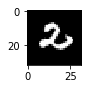

In [151]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

#### Setupo Tensorflow

In [152]:
EPOCHS = 10
BATCH_SIZE = 128

rate = 0.001

In [153]:
def createLeNetModel():
    model = Sequential()

    # Convenlutional layer 1. Input = 32 x 32 x 1. Output = 28 x 28 x 6
    model.add(Conv2D(6, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    
    # Pooling layer 1. Input = 28 x 28 x 6. Output = 14 x 14 x 6
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Convenlutional layer 2. Output = 10 x 10 x 16.
    model.add(Conv2D(16, (5, 5), activation='relu'))
    
    # Pooling layer 2. Input = 10 x 10 x 16. Otuput = 5 x 5 x 16
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
    
    model.add(Flatten())
    
    model.add(Dense(120, activation='relu'))
    
    model.add(Dense(84, activation='relu'))

    # Output layer
    model.add(Dense(10, activation='softmax'))
    
    #optimizer_adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [154]:
for train_index, test_index in randomShuffle.split(X):
    
    X_train = X[train_index, :]
    Y_train = Y[train_index, :]

    X_test = X[test_index, :]
    Y_test = Y[test_index, :]
    
    model = createLeNetModel()
    
    model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, verbose=1, batch_size=100)
    scores = model.evaluate(X_test, Y_test)
    accuracies.append(scores[1]*100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_120 (MaxPoolin (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_121 (MaxPoolin (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_43 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_93 (Dense)             (None, 84)                10164     
__________

56000/56000 [==============================] - 11s 192us/step - loss: 0.0042 - acc: 0.9990 - val_loss: 0.0661 - val_acc: 0.9896
Epoch 50/75
56000/56000 [==============================] - 11s 196us/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0615 - val_acc: 0.9908
Epoch 51/75
56000/56000 [==============================] - 11s 201us/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0616 - val_acc: 0.9910
Epoch 52/75
56000/56000 [==============================] - 11s 202us/step - loss: 4.4466e-04 - acc: 0.9999 - val_loss: 0.0614 - val_acc: 0.9921
Epoch 53/75
56000/56000 [==============================] - 12s 206us/step - loss: 3.3330e-04 - acc: 1.0000 - val_loss: 0.0613 - val_acc: 0.9918
Epoch 54/75
56000/56000 [==============================] - 12s 208us/step - loss: 2.9753e-04 - acc: 1.0000 - val_loss: 0.0614 - val_acc: 0.9919
Epoch 55/75
56000/56000 [==============================] - 12s 208us/step - loss: 2.9321e-04 - acc: 1.0000 - val_loss: 0.0624 - val_acc: 0.9921
Epoch 56/75
5600

56000/56000 [==============================] - 14s 243us/step - loss: 0.0068 - acc: 0.9980 - val_loss: 0.0423 - val_acc: 0.9903
Epoch 22/75
56000/56000 [==============================] - 14s 253us/step - loss: 0.0067 - acc: 0.9979 - val_loss: 0.0412 - val_acc: 0.9901
Epoch 23/75
56000/56000 [==============================] - 14s 251us/step - loss: 0.0049 - acc: 0.9983 - val_loss: 0.0409 - val_acc: 0.9920
Epoch 24/75
56000/56000 [==============================] - 14s 249us/step - loss: 0.0053 - acc: 0.9985 - val_loss: 0.0984 - val_acc: 0.9811
Epoch 25/75
56000/56000 [==============================] - 15s 260us/step - loss: 0.0076 - acc: 0.9976 - val_loss: 0.0517 - val_acc: 0.9898
Epoch 26/75
56000/56000 [==============================] - 14s 242us/step - loss: 0.0063 - acc: 0.9978 - val_loss: 0.0538 - val_acc: 0.9889
Epoch 27/75
56000/56000 [==============================] - 14s 247us/step - loss: 0.0044 - acc: 0.9984 - val_loss: 0.0555 - val_acc: 0.9901
Epoch 28/75
56000/56000 [=======

Train on 56000 samples, validate on 14000 samples
Epoch 1/75
56000/56000 [==============================] - 24s 430us/step - loss: 0.2954 - acc: 0.9108 - val_loss: 0.1128 - val_acc: 0.9633
Epoch 2/75
56000/56000 [==============================] - 13s 232us/step - loss: 0.0803 - acc: 0.9747 - val_loss: 0.0718 - val_acc: 0.9775 0.
Epoch 3/75
56000/56000 [==============================] - 13s 231us/step - loss: 0.0544 - acc: 0.9833 - val_loss: 0.0482 - val_acc: 0.9844
Epoch 4/75
56000/56000 [==============================] - 13s 233us/step - loss: 0.0431 - acc: 0.9865 - val_loss: 0.0398 - val_acc: 0.9879
Epoch 5/75
56000/56000 [==============================] - 13s 229us/step - loss: 0.0342 - acc: 0.9891 - val_loss: 0.0428 - val_acc: 0.9866
Epoch 6/75
56000/56000 [==============================] - 12s 217us/step - loss: 0.0286 - acc: 0.9907 - val_loss: 0.0408 - val_acc: 0.9874
Epoch 7/75
56000/56000 [==============================] - 13s 225us/step - loss: 0.0260 - acc: 0.9912 - val_loss:

56000/56000 [==============================] - 11s 205us/step - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0556 - val_acc: 0.9914
Epoch 59/75
56000/56000 [==============================] - 11s 202us/step - loss: 0.0056 - acc: 0.9986 - val_loss: 0.0623 - val_acc: 0.9907
Epoch 60/75
56000/56000 [==============================] - 11s 201us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0609 - val_acc: 0.9903
Epoch 61/75
56000/56000 [==============================] - 11s 200us/step - loss: 0.0014 - acc: 0.9996 - val_loss: 0.0591 - val_acc: 0.9904
Epoch 62/75
56000/56000 [==============================] - 11s 203us/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0636 - val_acc: 0.9906
Epoch 63/75
56000/56000 [==============================] - 11s 204us/step - loss: 0.0025 - acc: 0.9993 - val_loss: 0.0657 - val_acc: 0.9898
Epoch 64/75
56000/56000 [==============================] - 11s 204us/step - loss: 0.0050 - acc: 0.9988 - val_loss: 0.0651 - val_acc: 0.9899
Epoch 65/75
56000/56000 [=======

56000/56000 [==============================] - 10s 180us/step - loss: 0.0046 - acc: 0.9986 - val_loss: 0.0555 - val_acc: 0.9891
Epoch 31/75
56000/56000 [==============================] - 10s 180us/step - loss: 0.0052 - acc: 0.9984 - val_loss: 0.0521 - val_acc: 0.9911
Epoch 32/75
56000/56000 [==============================] - 10s 186us/step - loss: 0.0055 - acc: 0.9981 - val_loss: 0.0606 - val_acc: 0.9888
Epoch 33/75
56000/56000 [==============================] - 11s 197us/step - loss: 0.0058 - acc: 0.9982 - val_loss: 0.0492 - val_acc: 0.9921
Epoch 34/75
56000/56000 [==============================] - 12s 206us/step - loss: 0.0037 - acc: 0.9988 - val_loss: 0.0477 - val_acc: 0.9916
Epoch 35/75
56000/56000 [==============================] - 11s 199us/step - loss: 0.0046 - acc: 0.9985 - val_loss: 0.0596 - val_acc: 0.9890
Epoch 36/75
56000/56000 [==============================] - 11s 191us/step - loss: 0.0027 - acc: 0.9994 - val_loss: 0.0530 - val_acc: 0.9924
Epoch 37/75
56000/56000 [=======

56000/56000 [==============================] - 8s 137us/step - loss: 0.0717 - acc: 0.9779 - val_loss: 0.0691 - val_acc: 0.9779
Epoch 3/75
56000/56000 [==============================] - 7s 133us/step - loss: 0.0515 - acc: 0.9836 - val_loss: 0.0661 - val_acc: 0.9816
Epoch 4/75
56000/56000 [==============================] - 7s 132us/step - loss: 0.0419 - acc: 0.9868 - val_loss: 0.0514 - val_acc: 0.9854
Epoch 5/75
56000/56000 [==============================] - 8s 135us/step - loss: 0.0332 - acc: 0.9888 - val_loss: 0.0461 - val_acc: 0.9866
Epoch 6/75
56000/56000 [==============================] - 8s 142us/step - loss: 0.0293 - acc: 0.9907 - val_loss: 0.0494 - val_acc: 0.9851
Epoch 7/75
56000/56000 [==============================] - 7s 134us/step - loss: 0.0237 - acc: 0.9926 - val_loss: 0.0496 - val_acc: 0.9859
Epoch 8/75
56000/56000 [==============================] - 8s 137us/step - loss: 0.0217 - acc: 0.9928 - val_loss: 0.0450 - val_acc: 0.9881
Epoch 9/75
56000/56000 [=====================

Epoch 61/75
56000/56000 [==============================] - 8s 136us/step - loss: 0.0053 - acc: 0.9983 - val_loss: 0.0926 - val_acc: 0.9873
Epoch 62/75
56000/56000 [==============================] - 8s 139us/step - loss: 0.0026 - acc: 0.9993 - val_loss: 0.0705 - val_acc: 0.9894
Epoch 63/75
56000/56000 [==============================] - 8s 136us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0794 - val_acc: 0.9881
Epoch 64/75
56000/56000 [==============================] - 8s 139us/step - loss: 9.5036e-04 - acc: 0.9997 - val_loss: 0.0686 - val_acc: 0.9898
Epoch 65/75
56000/56000 [==============================] - 8s 136us/step - loss: 3.2895e-05 - acc: 1.0000 - val_loss: 0.0678 - val_acc: 0.9899
Epoch 66/75
56000/56000 [==============================] - 8s 138us/step - loss: 1.4247e-05 - acc: 1.0000 - val_loss: 0.0675 - val_acc: 0.9900
Epoch 67/75
56000/56000 [==============================] - 8s 138us/step - loss: 6.8532e-06 - acc: 1.0000 - val_loss: 0.0678 - val_acc: 0.9900
Epoch 68/75

56000/56000 [==============================] - 7s 131us/step - loss: 0.0043 - acc: 0.9987 - val_loss: 0.0563 - val_acc: 0.9903
Epoch 34/75
56000/56000 [==============================] - 7s 130us/step - loss: 0.0047 - acc: 0.9984 - val_loss: 0.0528 - val_acc: 0.9911
Epoch 35/75
56000/56000 [==============================] - 7s 129us/step - loss: 0.0022 - acc: 0.9994 - val_loss: 0.0600 - val_acc: 0.9899
Epoch 36/75
56000/56000 [==============================] - 7s 130us/step - loss: 0.0052 - acc: 0.9984 - val_loss: 0.0636 - val_acc: 0.9893
Epoch 37/75
56000/56000 [==============================] - 7s 133us/step - loss: 0.0043 - acc: 0.9987 - val_loss: 0.0569 - val_acc: 0.9906
Epoch 38/75
56000/56000 [==============================] - 7s 132us/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0537 - val_acc: 0.9920
Epoch 39/75
56000/56000 [==============================] - 8s 135us/step - loss: 0.0042 - acc: 0.9988 - val_loss: 0.0612 - val_acc: 0.9902
Epoch 40/75
56000/56000 [==============

56000/56000 [==============================] - 9s 161us/step - loss: 0.0338 - acc: 0.9892 - val_loss: 0.0433 - val_acc: 0.9867
Epoch 7/75
56000/56000 [==============================] - 8s 137us/step - loss: 0.0262 - acc: 0.9918 - val_loss: 0.0439 - val_acc: 0.9867
Epoch 8/75
56000/56000 [==============================] - 8s 148us/step - loss: 0.0229 - acc: 0.9925 - val_loss: 0.0385 - val_acc: 0.9882
Epoch 9/75
56000/56000 [==============================] - 9s 158us/step - loss: 0.0197 - acc: 0.9934 - val_loss: 0.0422 - val_acc: 0.9878
Epoch 10/75
56000/56000 [==============================] - 9s 160us/step - loss: 0.0178 - acc: 0.9942 - val_loss: 0.0443 - val_acc: 0.9867
Epoch 11/75
56000/56000 [==============================] - 8s 142us/step - loss: 0.0150 - acc: 0.9949 - val_loss: 0.0396 - val_acc: 0.9874
Epoch 12/75
56000/56000 [==============================] - 7s 133us/step - loss: 0.0123 - acc: 0.9958 - val_loss: 0.0452 - val_acc: 0.9864
Epoch 13/75
56000/56000 [=================

Epoch 65/75
56000/56000 [==============================] - 9s 159us/step - loss: 0.0024 - acc: 0.9992 - val_loss: 0.0629 - val_acc: 0.9896
Epoch 66/75
56000/56000 [==============================] - 10s 170us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0684 - val_acc: 0.9905
Epoch 67/75
56000/56000 [==============================] - 9s 157us/step - loss: 1.6971e-04 - acc: 1.0000 - val_loss: 0.0537 - val_acc: 0.9914
Epoch 68/75
56000/56000 [==============================] - 9s 154us/step - loss: 1.8681e-05 - acc: 1.0000 - val_loss: 0.0551 - val_acc: 0.9915
Epoch 69/75
56000/56000 [==============================] - 9s 153us/step - loss: 8.2867e-06 - acc: 1.0000 - val_loss: 0.0549 - val_acc: 0.9916
Epoch 70/75
56000/56000 [==============================] - 9s 154us/step - loss: 6.1312e-06 - acc: 1.0000 - val_loss: 0.0549 - val_acc: 0.9915
Epoch 71/75
56000/56000 [==============================] - 8s 149us/step - loss: 4.7489e-06 - acc: 1.0000 - val_loss: 0.0551 - val_acc: 0.9914
Epoch 

Epoch 38/75
56000/56000 [==============================] - 7s 123us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.0507 - val_acc: 0.9919
Epoch 39/75
56000/56000 [==============================] - 7s 124us/step - loss: 0.0068 - acc: 0.9981 - val_loss: 0.0612 - val_acc: 0.9882
Epoch 40/75
56000/56000 [==============================] - 7s 123us/step - loss: 0.0034 - acc: 0.9990 - val_loss: 0.0558 - val_acc: 0.9911
Epoch 41/75
56000/56000 [==============================] - 7s 124us/step - loss: 0.0057 - acc: 0.9984 - val_loss: 0.0509 - val_acc: 0.9906
Epoch 42/75
56000/56000 [==============================] - 7s 123us/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0536 - val_acc: 0.9915
Epoch 43/75
56000/56000 [==============================] - 7s 125us/step - loss: 0.0037 - acc: 0.9990 - val_loss: 0.0573 - val_acc: 0.9902
Epoch 44/75
56000/56000 [==============================] - 7s 124us/step - loss: 0.0045 - acc: 0.9986 - val_loss: 0.0579 - val_acc: 0.9896
Epoch 45/75
56000/56000 [==

56000/56000 [==============================] - 8s 144us/step - loss: 0.0156 - acc: 0.9951 - val_loss: 0.0408 - val_acc: 0.9886
Epoch 12/75
56000/56000 [==============================] - 8s 149us/step - loss: 0.0119 - acc: 0.9962 - val_loss: 0.0429 - val_acc: 0.9880
Epoch 13/75
56000/56000 [==============================] - 9s 166us/step - loss: 0.0126 - acc: 0.9959 - val_loss: 0.0429 - val_acc: 0.9890
Epoch 14/75
56000/56000 [==============================] - 9s 165us/step - loss: 0.0113 - acc: 0.9962 - val_loss: 0.0437 - val_acc: 0.9883
Epoch 15/75
56000/56000 [==============================] - 8s 146us/step - loss: 0.0089 - acc: 0.9973 - val_loss: 0.0432 - val_acc: 0.9891
Epoch 16/75
56000/56000 [==============================] - 9s 160us/step - loss: 0.0093 - acc: 0.9967 - val_loss: 0.0453 - val_acc: 0.9891
Epoch 17/75
56000/56000 [==============================] - 10s 184us/step - loss: 0.0082 - acc: 0.9972 - val_loss: 0.0438 - val_acc: 0.9898
Epoch 18/75
56000/56000 [=============

56000/56000 [==============================] - 8s 148us/step - loss: 6.4968e-05 - acc: 1.0000 - val_loss: 0.0589 - val_acc: 0.9910
Epoch 70/75
56000/56000 [==============================] - 8s 144us/step - loss: 1.5475e-05 - acc: 1.0000 - val_loss: 0.0588 - val_acc: 0.9911
Epoch 71/75
56000/56000 [==============================] - 7s 132us/step - loss: 8.4704e-06 - acc: 1.0000 - val_loss: 0.0596 - val_acc: 0.9911
Epoch 72/75
56000/56000 [==============================] - 7s 123us/step - loss: 6.1397e-06 - acc: 1.0000 - val_loss: 0.0601 - val_acc: 0.9914
Epoch 73/75
56000/56000 [==============================] - 9s 153us/step - loss: 4.7089e-06 - acc: 1.0000 - val_loss: 0.0606 - val_acc: 0.9912
Epoch 74/75
56000/56000 [==============================] - 9s 164us/step - loss: 3.6178e-06 - acc: 1.0000 - val_loss: 0.0610 - val_acc: 0.9914
Epoch 75/75
14000/14000 [==============================] - 3s 181us/step
_________________________________________________________________
Layer (type)   

56000/56000 [==============================] - 8s 137us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0518 - val_acc: 0.9913
Epoch 43/75
56000/56000 [==============================] - 8s 146us/step - loss: 0.0012 - acc: 0.9997 - val_loss: 0.0621 - val_acc: 0.9906
Epoch 44/75
56000/56000 [==============================] - 9s 153us/step - loss: 0.0047 - acc: 0.9986 - val_loss: 0.0973 - val_acc: 0.9856
Epoch 45/75
56000/56000 [==============================] - 8s 145us/step - loss: 0.0062 - acc: 0.9981 - val_loss: 0.0626 - val_acc: 0.9894
Epoch 46/75
56000/56000 [==============================] - 8s 142us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0562 - val_acc: 0.9907
Epoch 47/75
56000/56000 [==============================] - 7s 132us/step - loss: 0.0025 - acc: 0.9994 - val_loss: 0.0622 - val_acc: 0.9894
Epoch 48/75
56000/56000 [==============================] - 8s 147us/step - loss: 0.0040 - acc: 0.9989 - val_loss: 0.0672 - val_acc: 0.9884
Epoch 49/75
56000/56000 [==============

In [157]:
print(accuracies)

[99.2, 99.30714285714286, 99.0, 99.05000000000001, 99.02142857142857, 98.95, 99.17857142857143, 99.05000000000001, 99.13571428571429, 99.17857142857143]


In [158]:
avg = sum(accuracies) / 10
print(avg)

99.10714285714286
